In [36]:
import pandas as pd
from pandas import Series, DataFrame
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline

import quandl
from datetime import datetime
import pandas_datareader.data as web

In [4]:
tech_list = ['AAPL','GOOG','MSFT','AMZN']

end = datetime.now()
start = datetime(end.year - 1,end.month,end.day)

for stock in tech_list:   
    globals()[stock] = quandl.get('WIKI/{}'.format(stock), start_date=start, end_date=end)

In [5]:
AAPL.describe()

,Open,High,Low,Close,Volume,Ex-Dividend,Split Ratio,Adj. Open,Adj. High,Adj. Low,Adj. Close,Adj. Volume
count,237.000000,237.000000,237.000000,237.000000,2.370000e+02,237.000000,237.0,237.000000,237.000000,237.000000,237.000000,2.370000e+02
mean,161.072437,162.264722,159.794034,161.054424,2.909878e+07,0.005316,1.0,160.824148,162.014781,159.547415,160.805967,2.909878e+07
std,11.169115,11.304506,11.084793,11.147052,1.209444e+07,0.057751,0.0,11.449652,11.587948,11.359536,11.425770,1.209444e+07
min,141.220000,141.880000,140.450000,140.680000,1.394898e+07,0.000000,1.0,140.076098,140.730752,139.312335,139.540472,1.394898e+07
25%,153.420000,153.990000,152.110000,153.180000,2.075880e+07,0.000000,1.0,152.760183,153.546991,151.690000,152.560992,2.075880e+07
50%,159.510000,160.740000,158.270000,159.780000,2.564371e+07,0.000000,1.0,159.510000,160.710000,158.090000,159.760000,2.564371e+07
75%,172.150000,173.130000,170.530000,171.850000,3.332923e+07,0.000000,1.0,172.150000,173.130000,170.530000,171.850000,3.332923e+07
max,182.590000,183.500000,180.210000,181.720000,8.543608e+07,0.630000,1.0,182.590000,183.500000,180.210000,181.720000,8.543608e+07


In [6]:
AAPL.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 237 entries, 2017-04-17 to 2018-03-27
Data columns (total 12 columns):
Open           237 non-null float64
High           237 non-null float64
Low            237 non-null float64
Close          237 non-null float64
Volume         237 non-null float64
Ex-Dividend    237 non-null float64
Split Ratio    237 non-null float64
Adj. Open      237 non-null float64
Adj. High      237 non-null float64
Adj. Low       237 non-null float64
Adj. Close     237 non-null float64
Adj. Volume    237 non-null float64
dtypes: float64(12)
memory usage: 24.1 KB


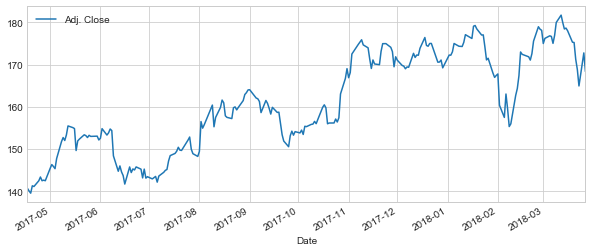

In [8]:
AAPL['Adj. Close'].plot(legend=True, figsize=(10,4))

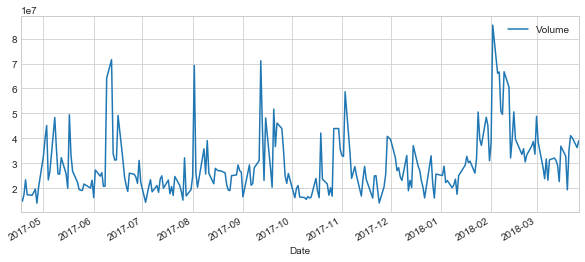

In [9]:
AAPL['Volume'].plot(legend=True, figsize=(10,4))

In [11]:
ma_day = [10, 20, 50]

for ma in ma_day:
    column_name = "MA {}".format(str(ma))
    AAPL[column_name] = pd.rolling_mean(AAPL['Adj. Close'], ma)

/usr/local/lib/python3.6/site-packages/ipykernel_launcher.py:5: FutureWarning: pd.rolling_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=10,center=False).mean()
  """
/usr/local/lib/python3.6/site-packages/ipykernel_launcher.py:5: FutureWarning: pd.rolling_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=20,center=False).mean()
  """
/usr/local/lib/python3.6/site-packages/ipykernel_launcher.py:5: FutureWarning: pd.rolling_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=50,center=False).mean()
  """


In [12]:
AAPL.head()

,Open,High,Low,Close,Volume,Ex-Dividend,Split Ratio,Adj. Open,Adj. High,Adj. Low,Adj. Close,Adj. Volume,MA 10,MA 20,MA 50
Date,,,,,,,,,,,,,,,
2017-04-17,141.48,141.88,140.87,141.83,16582094.0,0.0,1.0,140.333992,140.730752,139.728933,140.681157,16582094.0,NaN,NaN,NaN
2017-04-18,141.41,142.04,141.11,141.20,14697544.0,0.0,1.0,140.264559,140.889456,139.966989,140.056260,14697544.0,NaN,NaN,NaN
2017-04-19,141.88,142.00,140.45,140.68,17328375.0,0.0,1.0,140.730752,140.849780,139.312335,139.540472,17328375.0,NaN,NaN,NaN
2017-04-20,141.22,142.92,141.16,142.44,23319562.0,0.0,1.0,140.076098,141.762328,140.016584,141.286216,23319562.0,NaN,NaN,NaN
2017-04-21,142.44,142.68,141.85,142.27,17320928.0,0.0,1.0,141.286216,141.524272,140.700995,141.117593,17320928.0,NaN,NaN,NaN


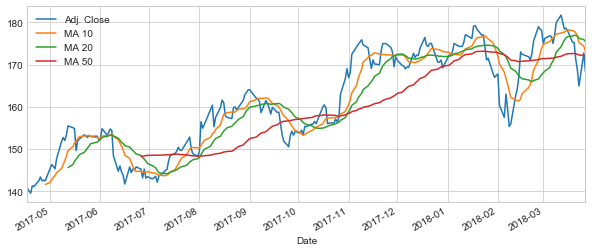

In [16]:
AAPL[['Adj. Close', 'MA 10', 'MA 20', 'MA 50']].plot(subplots=False,
                                                    figsize=(10,4))

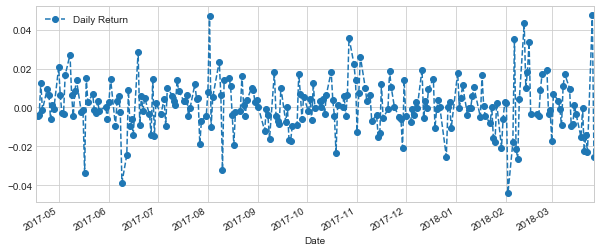

In [18]:
AAPL['Daily Return'] = AAPL['Adj. Close'].pct_change()
AAPL['Daily Return'].plot(figsize=(10,4), legend=True,
                         linestyle='--', marker='o')

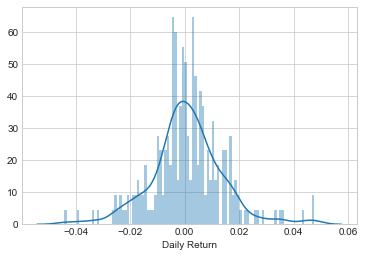

In [22]:
#AAPL['Daily Return'].hist(bins=100)

sns.distplot(AAPL['Daily Return'].dropna(), bins=100)

In [23]:
closing_df = DataFrame()
for stock in tech_list:
    closing_df[stock] = quandl.get('WIKI/{}'.format(stock), start_date=start, end_date=end)['Adj. Close']

In [24]:
closing_df.head()

,AAPL,GOOG,MSFT,AMZN
Date,,,,
2017-04-17,140.681157,837.17,64.442975,901.99
2017-04-18,140.056260,836.82,64.354400,903.78
2017-04-19,139.540472,838.21,64.009943,899.20
2017-04-20,141.286216,841.65,64.462658,902.06
2017-04-21,141.117593,843.19,65.348404,898.53


In [25]:
tech_rets = closing_df.pct_change()

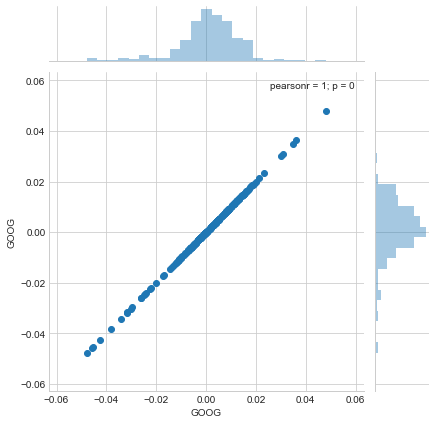

In [28]:
sns.jointplot('GOOG', 'GOOG', tech_rets, kind='scatter')

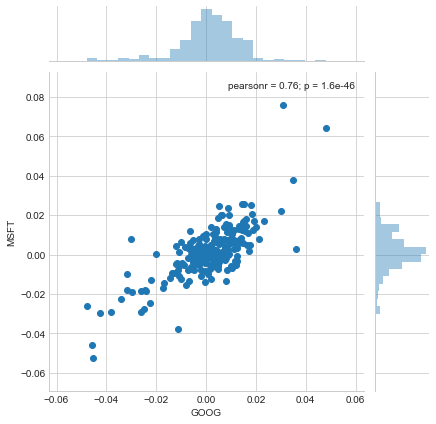

In [29]:
sns.jointplot('GOOG', 'MSFT', tech_rets, kind='scatter')

In [32]:
tech_rets.corr(method='pearson')

,AAPL,GOOG,MSFT,AMZN
AAPL,1.000000,0.628098,0.632440,0.538579
GOOG,0.628098,1.000000,0.764518,0.651013
MSFT,0.632440,0.764518,1.000000,0.674271
AMZN,0.538579,0.651013,0.674271,1.000000


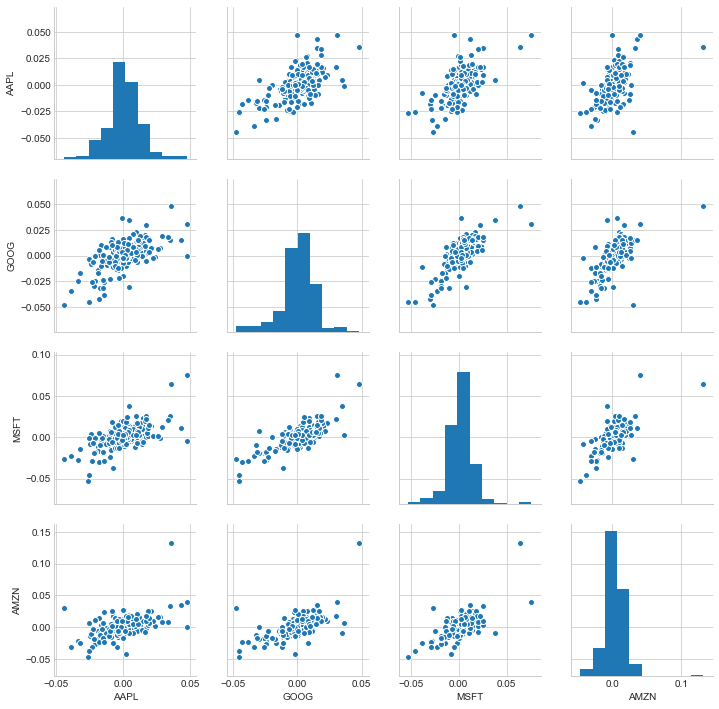

In [34]:
sns.pairplot(tech_rets.dropna())

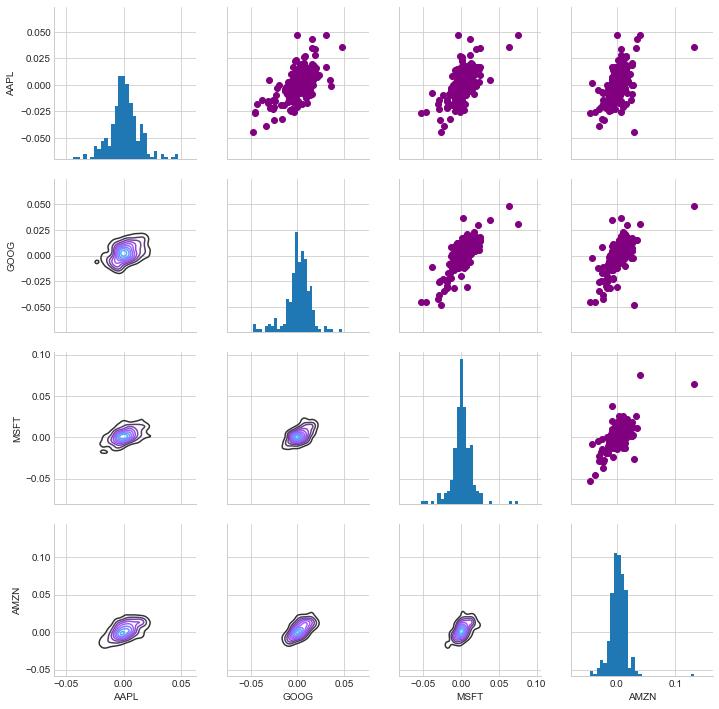

In [38]:
returns_fig = sns.PairGrid(tech_rets.dropna())

returns_fig.map_upper(plt.scatter, color='purple')

returns_fig.map_lower(sns.kdeplot, cmap='cool_d')

returns_fig.map_diag(plt.hist, bins=30)

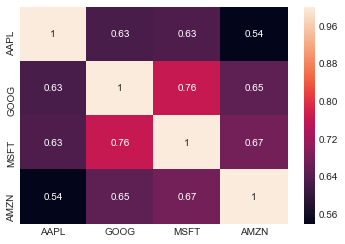

In [40]:
sns.heatmap(tech_rets.corr(), annot=True)